<a href="https://colab.research.google.com/github/Anjasfedo/scikit-learn/blob/main/calm-notebooks/scikit_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x = feature

y = label

x & y -> | model | -> pred

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata1.csv')

df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       252 non-null    float64
 1   y       252 non-null    float64
 2   z       252 non-null    object 
dtypes: float64(2), object(1)
memory usage: 6.0+ KB


In [15]:
X = df[['x', 'y']].values
y = df['z'] == 'a'

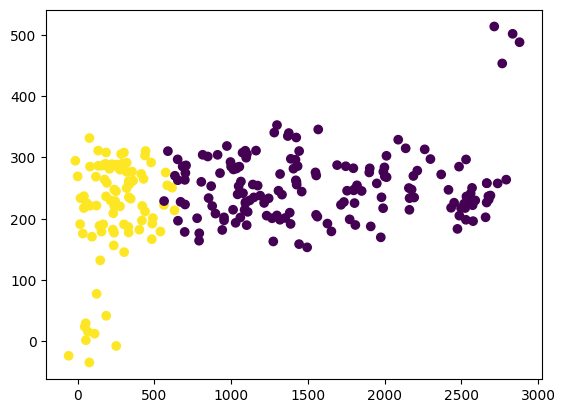

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# Scaling
rescale data with same information but have different number

with `StandardScaler` that calculate mean of variable

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(X)

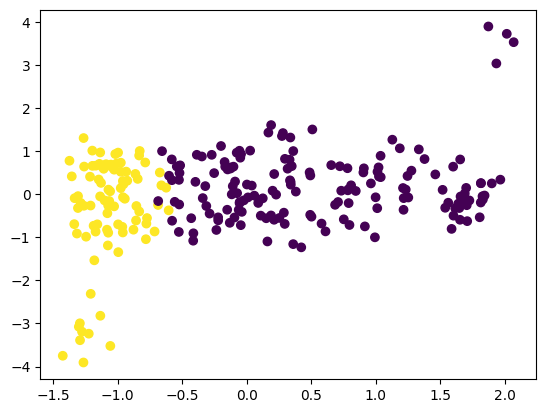

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

the y got 8 unit, but x got ~3

(array([ 18., 188., 188., 150., 103.,  91.,  61.,  42.,  37.,  36.,  24.,
         11.,  10.,   5.,   9.,   6.,   6.,   2.,   0.,   3.,   4.,   2.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.1792161 , -0.4325494 ,  2.31411731,  5.06078401,  7.80745071,
        10.55411742, 13.30078412, 16.04745082, 18.79411753, 21.54078423,
        24.28745093, 27.03411764, 29.78078434, 32.52745104, 35.27411775,
        38.02078445, 40.76745115, 43.51411786, 46.26078456, 49.00745127,
        51.75411797, 54.50078467, 57.24745138, 59.99411808, 62.74078478,
        65.48745149, 68.23411819, 70.98078489, 73.7274516 , 76.4741183 ,
        79.220785  ]),
 <BarContainer object of 30 artists>)

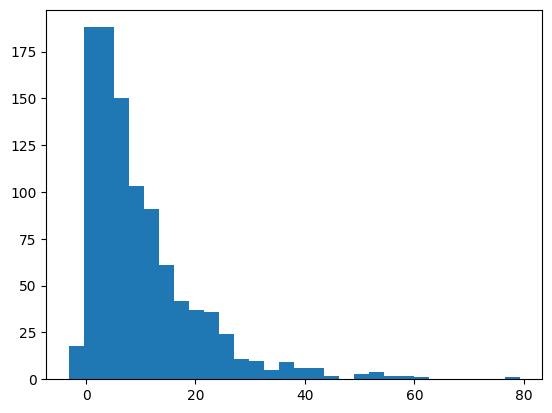

In [31]:
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))

plt.hist(x, 30)

(array([ 18., 188., 188., 150., 103.,  91.,  61.,  42.,  37.,  36.,  24.,
         11.,  10.,   5.,   9.,   6.,   6.,   2.,   0.,   3.,   4.,   2.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.28085063, -1.01532554, -0.74980046, -0.48427538, -0.21875029,
         0.04677479,  0.31229988,  0.57782496,  0.84335004,  1.10887513,
         1.37440021,  1.6399253 ,  1.90545038,  2.17097547,  2.43650055,
         2.70202563,  2.96755072,  3.2330758 ,  3.49860089,  3.76412597,
         4.02965106,  4.29517614,  4.56070122,  4.82622631,  5.09175139,
         5.35727648,  5.62280156,  5.88832665,  6.15385173,  6.41937681,
         6.6849019 ]),
 <BarContainer object of 30 artists>)

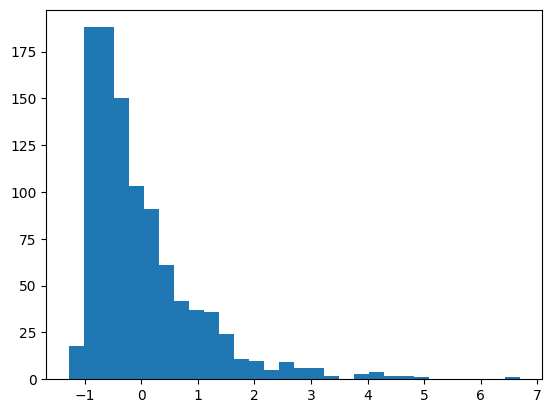

In [32]:
plt.hist((x - np.mean(x)) / np.std(x), 30)

handle the outliers

# Quantiles

In [36]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=100)
X_new_q = qt.fit_transform(X)

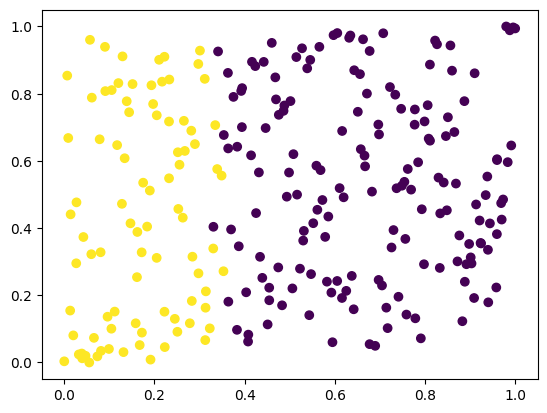

In [37]:
plt.scatter(X_new_q[:, 0], X_new_q[:, 1], c=y)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

def plot_output(scaler):
  pipe = Pipeline([
      ("scale", scaler),
      ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
  ])

  pred = pipe.fit(X, y).predict(X)

  plt.figure(figsize=(9, 3))
  plt.subplot(131)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.title("Original Data")
  plt.subplot(132)
  X_tfm = scaler.transform(X)
  plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
  plt.title("Transformed Data")
  plt.subplot(133)
  X_new = np.concatenate([
      np.random.uniform(0, X[:, 0].max(), (5000, 1)),
      np.random.uniform(0, X[:, 1].max(), (5000, 1))
  ], axis=1)
  y_proba = pipe.predict_proba(X_new)
  plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
  plt.title("Predicted Data")

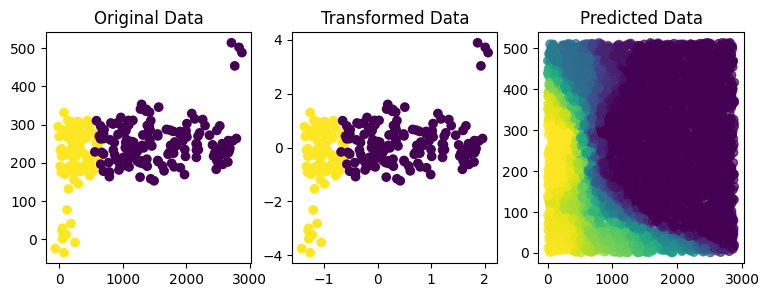

In [39]:
plot_output(StandardScaler())

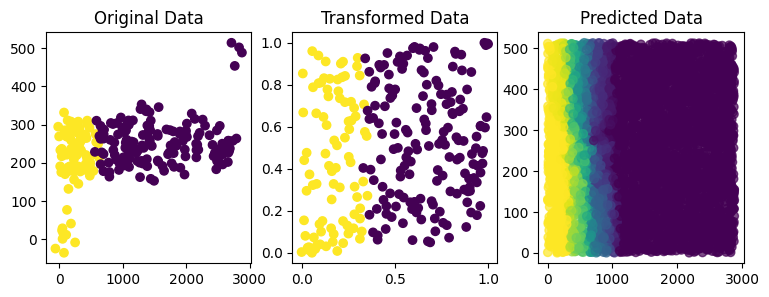

In [40]:
plot_output(QuantileTransformer(n_quantiles=100))

# New Dataset

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata2.csv')

df.head()

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


In [42]:
X = df[['x', 'y']].values
y = df['z'] == 'a'

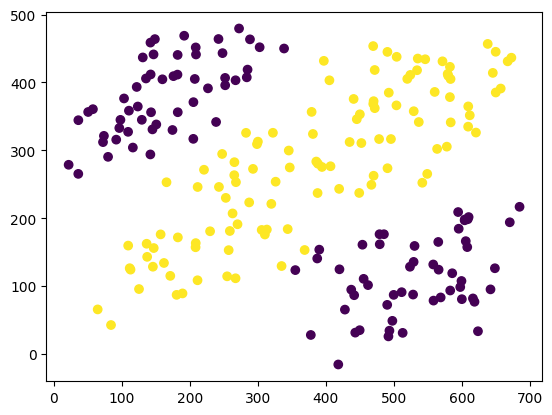

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y)

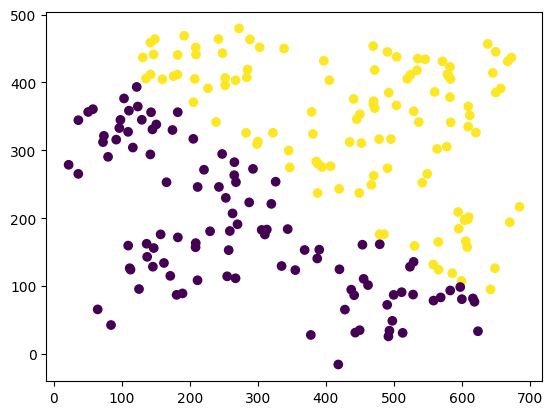

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

prediction was mess

meed to more linear feature, into non linear feature

# Polynomial Features

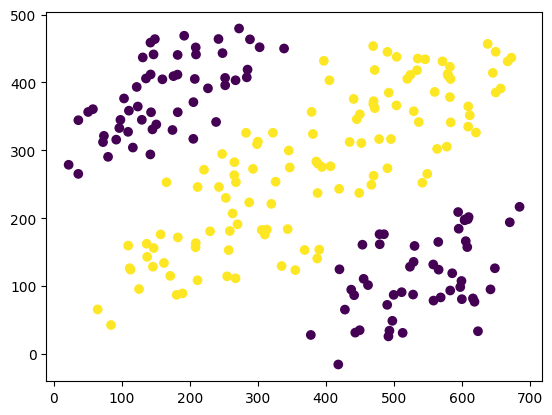

In [46]:
from sklearn.preprocessing import PolynomialFeatures

pipe_new = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe_new.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

# One hot encoding

In [51]:
arr = np.array(['low', 'low', 'medium', 'high']).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['medium'],
       ['high']], dtype='<U6')

In [57]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [61]:
enc.transform([['zero']])

array([[0., 0., 0.]])

drawdata.xyz